In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
def plotTsne( numRows=100,
             maxVal=10,
             fact=20):
    
    scalingFactor=fact*maxVal
    df=pd.DataFrame( {'a' : np.random.randint(low=0,high=maxVal,size=numRows)/scalingFactor,
                      'b' : np.random.randint(low=0,high=maxVal,size=numRows)/scalingFactor,
                      'c' : np.random.randint(low=0,high=maxVal,size=numRows)/scalingFactor,
                     'd' : np.random.randint(low=0,high=maxVal,size=numRows)/scalingFactor })

    dfTsne = pd.DataFrame( TSNE().fit_transform(df) )
    dfTsne['resp'] =  np.random.binomial(n=1,p=0.05,size=numRows) #bernouilli with low prob of sucess
    
    sns.scatterplot( x=0,y=1,hue='resp', data=dfTsne)
    
    return df

20
a    0.02110
b    0.02270
c    0.02235
d    0.02225
dtype: float64
40
a    0.011550
b    0.011300
c    0.012175
d    0.011625
dtype: float64
1000000
a    4.510000e-07
b    4.330000e-07
c    4.360000e-07
d    4.580000e-07
dtype: float64


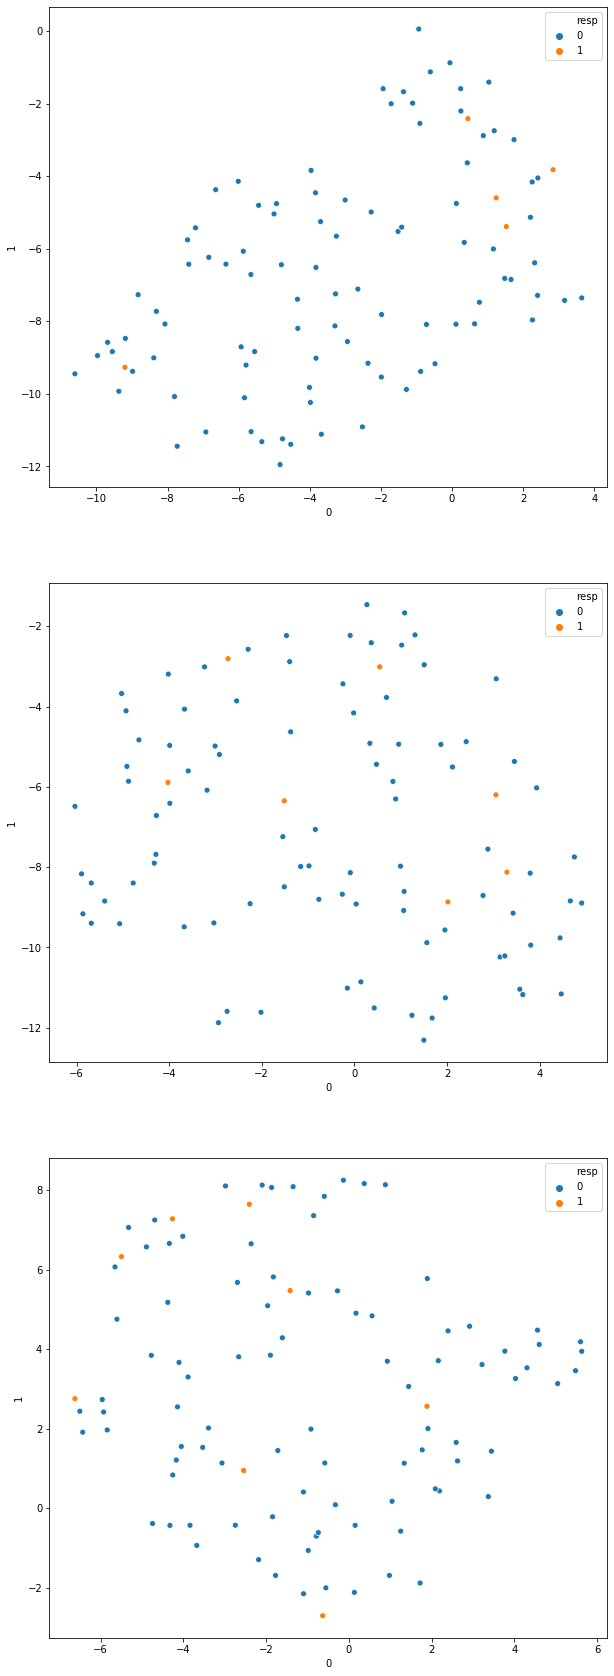

In [11]:
plt.figure(figsize=(10,30))
for k,f in enumerate([20,40,10**6]):
    plt.subplot(3,1,k+1)
    dfTsne=plotTsne(fact = f)
    print(f)
    print(dfTsne.agg('mean'))

In [46]:
def plotTsneAsymetric( numRows=100,
             maxValA=10,
             maxValB=100,
             fact=20):
    
    scalingFactor=fact*10
    df=pd.DataFrame( {'a' : np.random.randint(low=0,high=maxValA,size=numRows)/scalingFactor,
                      'b' : np.random.randint(low=0,high=maxValB,size=numRows)/scalingFactor,
                      'c' : np.random.randint(low=0,high=maxValA,size=numRows)/scalingFactor,
                     'd' : np.random.randint(low=0,high=maxValB,size=numRows)/scalingFactor })

    dfTsne = pd.DataFrame( TSNE().fit_transform(df) )
    dfTsne['resp'] = np.random.binomial(n=1,p=0.05,size=numRows)
    
    sns.scatterplot( x=0,y=1,hue='resp', data=dfTsne)
    
    return df

1000000
a    4.330000e-07
b    5.057000e-06
c    4.510000e-07
d    4.701000e-06
dtype: float64


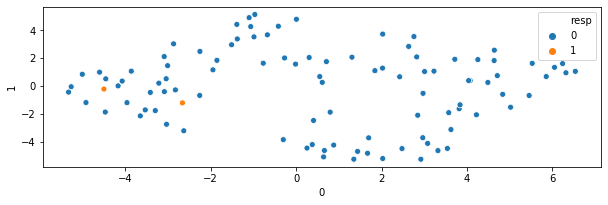

In [65]:
plt.figure(figsize=(10,10))
for k,f in enumerate([10**6]):
    plt.subplot(3,1,k+1)
    dfTsne=plotTsneAsymetric(fact = f)
    print(f)
    print(dfTsne.agg('mean'))